# 1. Column-Wise Analysis:

In [36]:
# import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# Load the dataset
df = pd.read_excel(r"C:\Users\Deepan Kaarthik T\Downloads\DA -Task 2..xlsx", sheet_name='Sheet1')

# Function to analyze each column

def column_analysis(df):
    analysis = pd.DataFrame({
        'Column Name': df.columns,
        'Total Values': df.count(),
        'Unique Values': df.nunique(),
        'Null Values': df.isnull().sum(),
        'Data Type': df.dtypes,
        'Duplicate Values': df.duplicated().sum()
    })
    return analysis

# Perform the column-wise analysis
analysis = column_analysis(df)
analysis


,Column Name,Total Values,Unique Values,Null Values,Data Type,Duplicate Values
VIN,VIN,100,98,0,object,0
TRANSACTION_ID,TRANSACTION_ID,100,32,0,int64,0
CORRECTION_VERBATIM,CORRECTION_VERBATIM,100,93,0,object,0
CUSTOMER_VERBATIM,CUSTOMER_VERBATIM,100,100,0,object,0
REPAIR_DATE,REPAIR_DATE,100,29,0,datetime64[ns],0
CAUSAL_PART_NM,CAUSAL_PART_NM,95,18,5,object,0
GLOBAL_LABOR_CODE_DESCRIPTION,GLOBAL_LABOR_CODE_DESCRIPTION,100,4,0,object,0
PLATFORM,PLATFORM,100,11,0,object,0
BODY_STYLE,BODY_STYLE,100,6,0,object,0
VPPC,VPPC,100,26,0,object,0


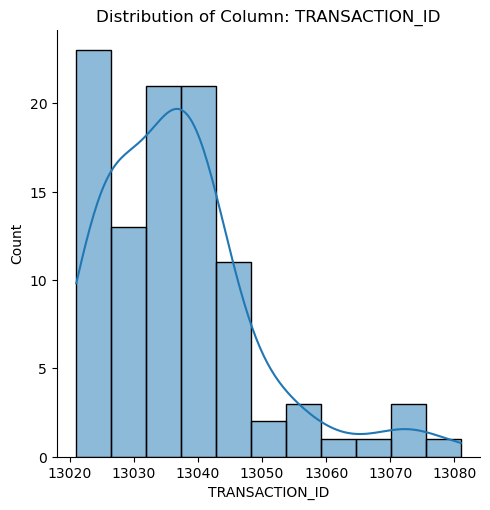

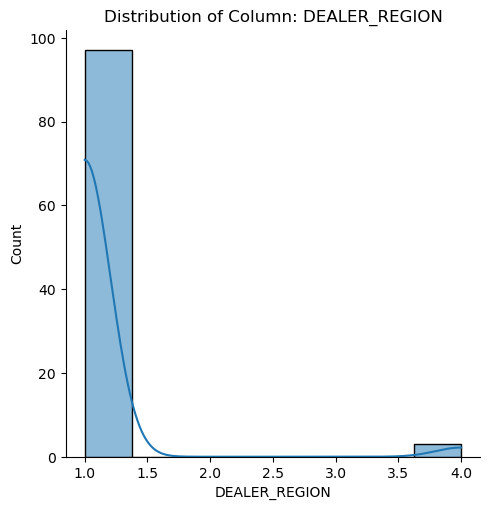

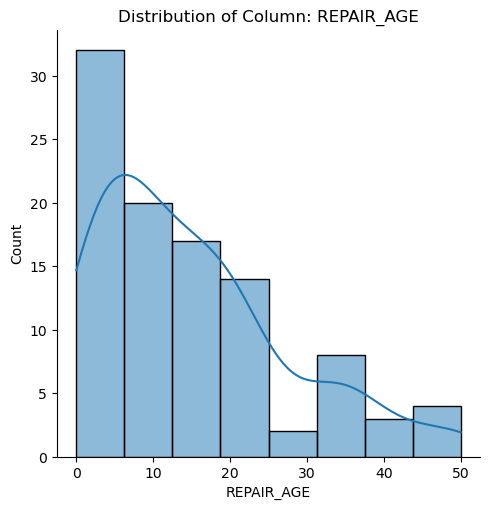

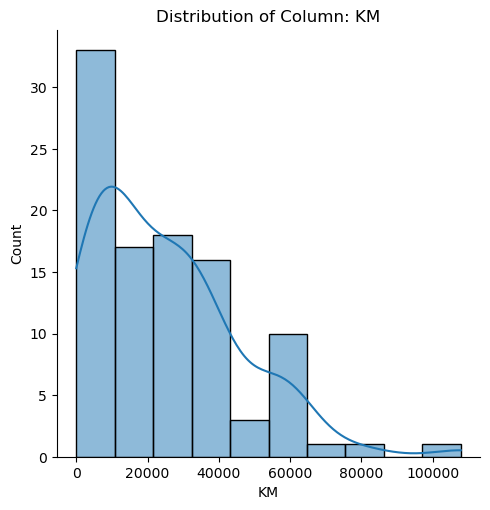

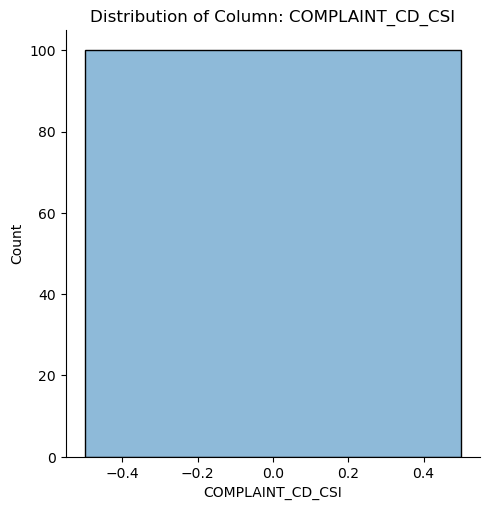

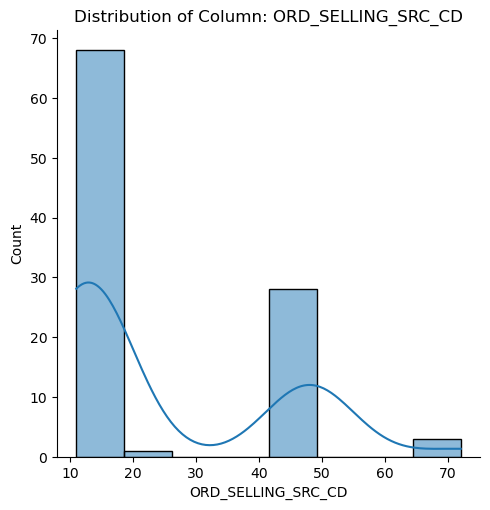

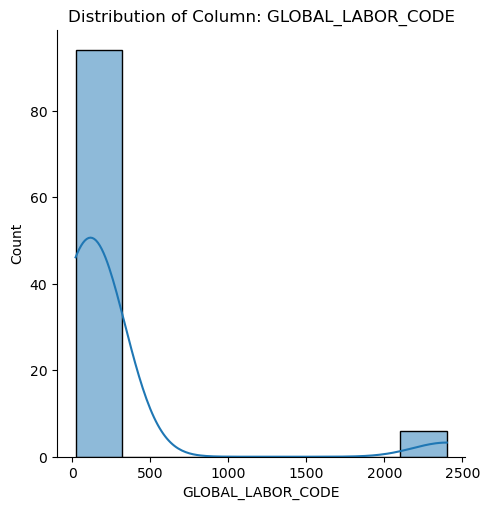

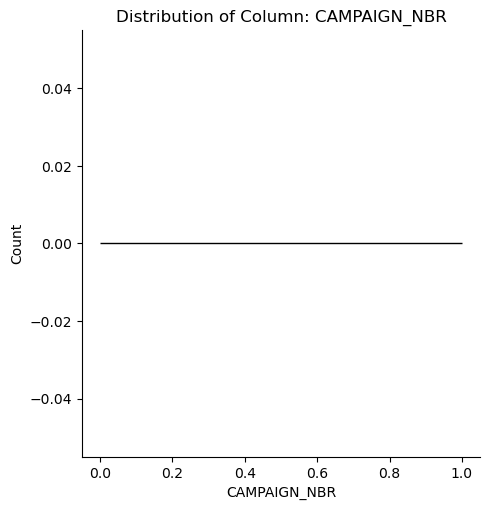

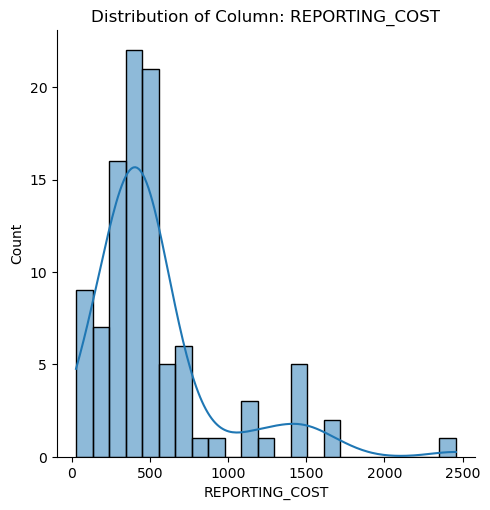

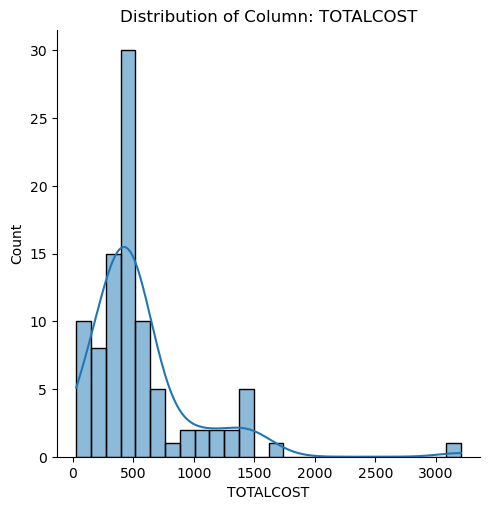

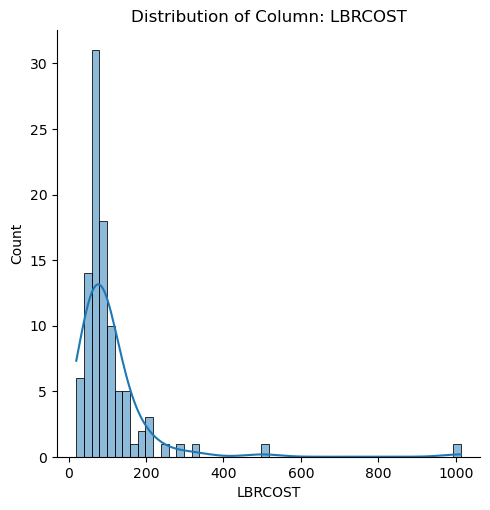

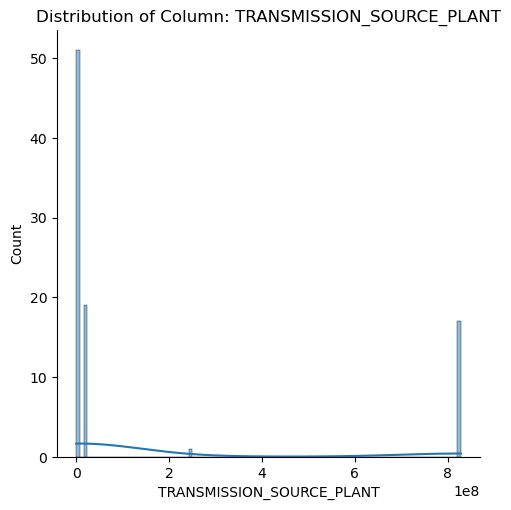

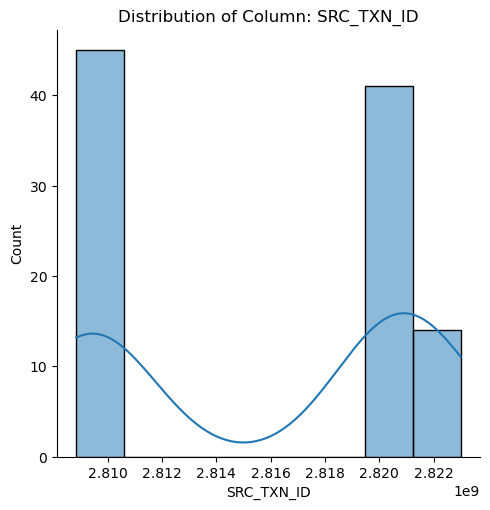

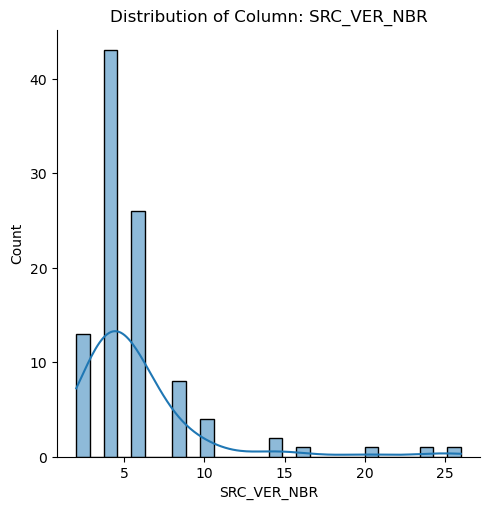

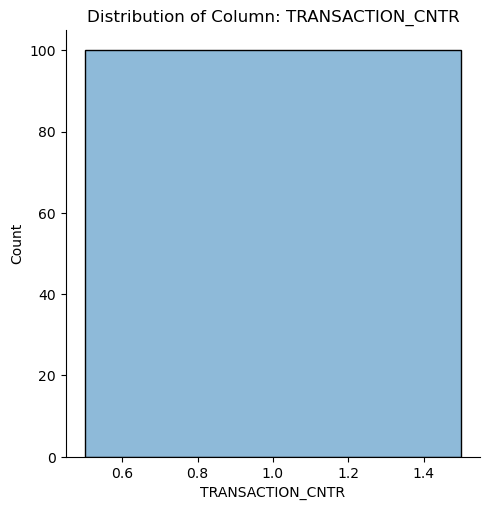

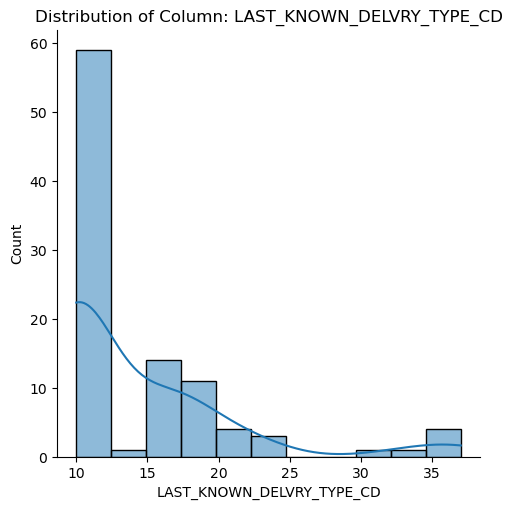

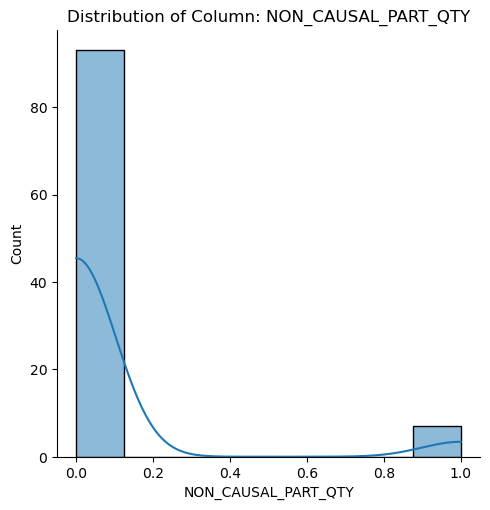

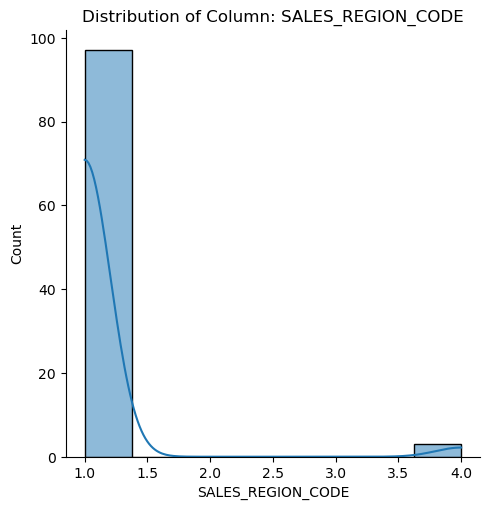

In [37]:
# distribution plot of all numeric columns

for col in df.select_dtypes(include='number').columns:
    sns.displot(data=df, x=col, kde=True)
    plt.title(f'Distribution of Column: {col}')
    plt.show()




# 2. Data Cleaning:


In [38]:
# Check for null values.

df.isnull().sum()

# Drop null values
columns_to_check = [
    'CAUSAL_PART_NM', 'PLANT', 'STATE', 'REPAIR_DLR_POSTAL_CD', 'VEH_TEST_GRP',
    'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'TOTALCOST',
    'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
    'TRANSMISSION_TRACE_NBR', 'LINE_SERIES', 'LAST_KNOWN_DELVRY_TYPE_CD'
]
df.dropna(subset=columns_to_check,inplace=True)

# drop insufficient data columns

df.drop('CAMPAIGN_NBR',axis = 1,inplace=True)


# Check Categorical Column and convert it into Categorical format

columns_to_convert = [
    'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC',
    'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_CITY', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
    'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
    'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
    'TRANSACTION_CATEGORY', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
    'TRANSMISSION_SOURCE_PLANT', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LAST_KNOWN_DELVRY_TYPE_CD',
    'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE'
]

# Convert columns to category type
for column in columns_to_convert:
    df[column] = df[column].astype('category')

# Verify the data types
print(df[columns_to_convert].dtypes)





CAUSAL_PART_NM                   category
GLOBAL_LABOR_CODE_DESCRIPTION    category
PLATFORM                         category
BODY_STYLE                       category
VPPC                             category
PLANT                            category
BUILD_COUNTRY                    category
LAST_KNOWN_DLR_CITY              category
REPAIR_DLR_CITY                  category
STATE                            category
DEALER_REGION                    category
REPAIR_DLR_POSTAL_CD             category
REPAIR_AGE                       category
COMPLAINT_CD                     category
VEH_TEST_GRP                     category
COUNTRY_SALE_ISO                 category
ORD_SELLING_SRC_CD               category
OPTN_FAMLY_CERTIFICATION         category
OPTF_FAMLY_EMISSIOF_SYSTEM       category
GLOBAL_LABOR_CODE                category
TRANSACTION_CATEGORY             category
ENGINE                           category
ENGINE_DESC                      category
TRANSMISSION                     c

In [39]:
# Convert the specified columns to uppercase
df['CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].str.upper()
df['CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].str.upper()

# Remove commas and convert to float
df['REPORTING_COST'] = df['REPORTING_COST'].replace({',': ''}, regex=True).astype(float)
df['TOTALCOST'] = df['TOTALCOST'].replace({',': ''}, regex=True).astype(float)
df['LBRCOST'] = df['LBRCOST'].replace({',': ''}, regex=True).astype(float)


In [40]:
from scipy import stats

# Calculate Z-scores for each numerical column
z_scores = stats.zscore(df.select_dtypes(include='float64'))

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Check how many outliers there are for each column
outlier_counts_zscore = outliers_zscore.sum(axis=0)
print("Outliers per numerical column based on Z-score:")
print(outlier_counts_zscore)

# Remove rows with outliers based on Z-score for each numerical column
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)].all(axis=1)

# Check the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Outliers per numerical column based on Z-score:
REPORTING_COST    2
TOTALCOST         0
LBRCOST           1
dtype: int64
Shape before removing outliers: (62, 51)
Shape after removing outliers: (62,)


# 3. Identifying Critical Columns:
    

## Select the Top 5 Citical Columns that must be most insightful.
df1=df[["REPAIR_DATE","TOTALCOST","COUNTRY_SALE_ISO","CAUSAL_PART_NM","GLOBAL_LABOR_CODE_DESCRIPTION","KM"]]

### The selection of the columns "REPAIR_DATE","TOTALCOST","COUNTRY_SALE_ISO","CAUSAL_PART_NM","GLOBAL_LABOR_CODE_DESCRIPTION","KM" likely reflects a focus on understanding vehicle repair data, associated costs, and identifying issues. Here's a detailed reasoning for each column's inclusion:

### COUNTRY_SALE_ISO (ISO country code of the sale region):
### Reason for Selection: The repair date is essential for understanding the temporal aspects of the data. It helps in tracking trends, seasonality, or patterns in repairs over time. Stakeholders can use this data to identify peak periods, assess the efficiency of repair cycles, or evaluate service performance against time.

### CAUSAL_PART_NM (Causal Part Name):
### Reason for Selection: Identifying the causal parts (i.e., the parts responsible for the repair) helps stakeholders understand the most common issues or failures in the system. It can highlight parts that frequently require repair, guiding inventory management, part quality improvements, or decisions about warranties.

### GLOBAL_LABOR_CODE_DESCRIPTION:
### Reason for Selection: This column provides details on the type of labor performed during the repair process. It’s important for understanding labor costs, efficiency, and the types of services rendered (e.g., diagnostic work, part installation). Analyzing this can provide insights into labor usage patterns and operational efficiency.

### REPAIR_DATE:
###  Reason for Selection: The repair date helps in understanding when repairs occurred. It can be used to analyze trends over time, such as seasonal patterns in repairs, and can help with forecasting future repair needs or understanding vehicle usage and wear patterns.

### TOTALCOST:
### Reason for Selection: This column represents the total cost of repairs and is critical for financial analysis. Analyzing the total cost helps identify high-cost repairs, assess the effectiveness of maintenance programs, and calculate profitability or loss from servicing specific vehicles. It also allows for cost comparison between different types of repairs or vehicles.

### KM (Kilometers):
### Reason for Selection: The distance traveled (in kilometers) is a critical factor in understanding vehicle wear and tear or maintenance frequency. This column can show the correlation between usage and repairs, helping stakeholders predict future repair needs based on the amount of use a vehicle or machine has undergone.

# Generate Visualizations

In [41]:
# Generate Visualizations

d1 = df.groupby('COUNTRY_SALE_ISO')['TOTALCOST'].sum().reset_index(name='Total Cost').sort_values(by='Total Cost', ascending=False).reset_index(drop=True)
d2 = df.groupby('REPAIR_DATE')['TOTALCOST'].sum().reset_index(name='Total Cost').sort_values(by='Total Cost', ascending=False).reset_index(drop=True)
d3 = df.groupby('GLOBAL_LABOR_CODE_DESCRIPTION')['TOTALCOST'].sum().reset_index(name='Total Cost').sort_values(by='Total Cost', ascending=False).reset_index(drop=True)
d4 = df.groupby('CAUSAL_PART_NM')['KM'].sum().reset_index(name='Total KM').sort_values(by='Total KM', ascending=False).reset_index(drop=True)



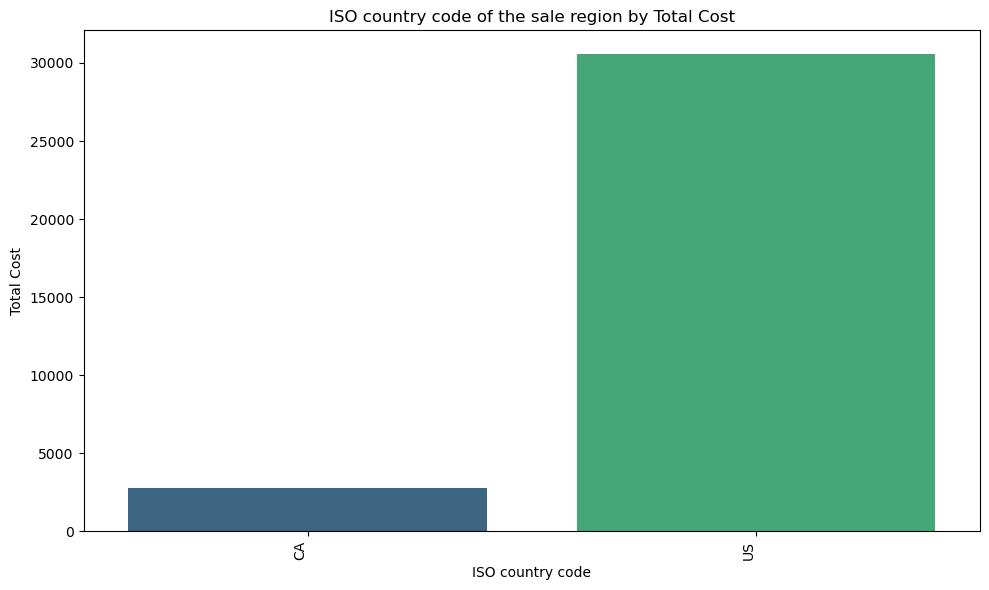

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=d1, x='COUNTRY_SALE_ISO', y='Total Cost', palette='viridis')

# Adding data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='white', fontweight='bold',
                       xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90, ha='right')
plt.title('ISO country code of the sale region by Total Cost')
plt.xlabel('ISO country code')
plt.ylabel('Total Cost')
plt.tight_layout()
plt.show()



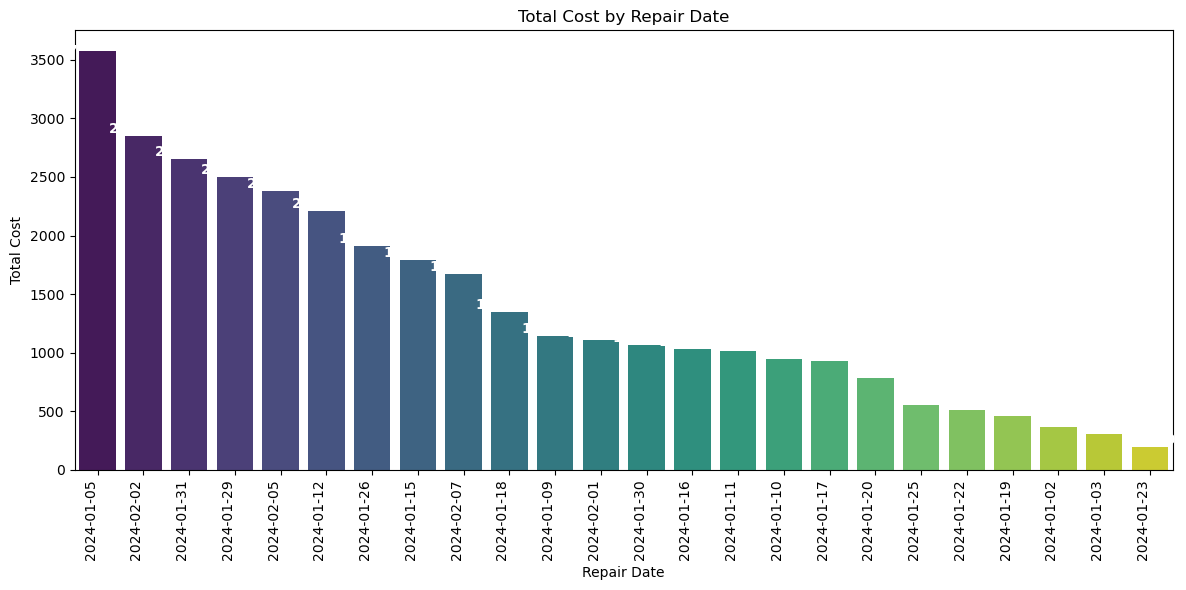

In [43]:
# Grouping data by 'REPAIR_DATE' and summing 'TOTALCOST'
d2 = df.groupby('REPAIR_DATE')['TOTALCOST'].sum().reset_index(name='Total Cost').sort_values(by='Total Cost', ascending=False).reset_index(drop=True)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=d2, x='REPAIR_DATE', y='Total Cost', palette='viridis')

# Adding data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='white', fontweight='bold',
                       xytext=(0, 5), textcoords='offset points')

# Customize plot labels and title
plt.xticks(rotation=90, ha='right')
plt.title('Total Cost by Repair Date')
plt.xlabel('Repair Date')
plt.ylabel('Total Cost')
plt.tight_layout()

# Display the plot
plt.show()


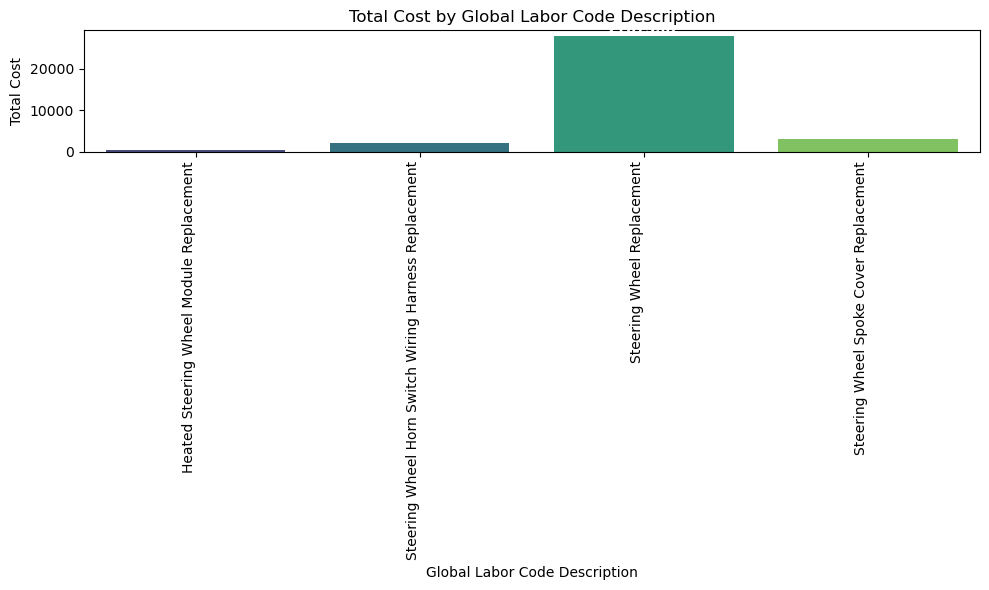

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=d3, x='GLOBAL_LABOR_CODE_DESCRIPTION', y='Total Cost', palette='viridis')

# Adding data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='white', fontweight='bold',
                       xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90, ha='right')
plt.title('Total Cost by Global Labor Code Description')
plt.xlabel('Global Labor Code Description')
plt.ylabel('Total Cost')
plt.tight_layout()
plt.show()


# 4. Generating tags From the free text available:

In [46]:
import spacy
nlp = spacy.load('en_core_web_lg')
nlp
import json
with open(r"D:\STUDY MATERIAL\RESUME\Resume\Deepan's AXION RAY TASK ASNMT\Scripts\Deepan's Manually Tagged 15 Records.json", 'r', encoding='utf8') as f:
    data = json.load(f)
data


training_data = []

# Iterate through the annotations
for annotation in data.get('annotations', []):  # Using .get() ensures we avoid errors if 'annotations' key is missing
    if annotation is not None:
        # Ensure annotation is a valid list/tuple
        if isinstance(annotation, (list, tuple)) and len(annotation) > 1:
            text = annotation[0].replace('\t', ' ').strip()  # Replace tabs with spaces and strip any extra whitespace
            entities = annotation[1].get('entities', [])  # Extract entities safely
            temp_annotations = []
            
            # Iterate over the entities
            for entity in entities:
                if isinstance(entity, (list, tuple)) and len(entity) >= 3:
                    start, end, label = entity  # Extract start, end, and label for each entity
                    temp_annotations.append((start, end, label.upper()))  # Convert label to uppercase
            training_data.append((text, {"entities": temp_annotations}))  # Append text and entities to training data
        else:
            print(f"Skipping invalid annotation: {annotation}")
    else:
        print("Skipping None annotation")

# Print the first training data entry to verify
print(training_data[0])  # Change the index based on the training data size


from spacy.tokens import DocBin
from tqdm import tqdm
nlp= spacy.blank("en")
doc_bin=DocBin()


import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

# Create a blank SpaCy model
nlp = spacy.blank("en")

# Create a DocBin object to store the training data
doc_bin = DocBin()

# Example training data (adjust this based on your cleaned data)
# training_data = [
#     ("REPLACED STEERING WHEEL NOW OKAY", {"entities": [(2, 10, 'FIXED CONDITION 1'), (11, 25, 'FIXED COMPONENT 1'), (37, 51, 'FAILURE COMPONENT 1'), (52, 64, 'FAILURE CONDITION 1')]})
#     # Add more annotated data here...
# ]

# Process each example
for text, annotations in tqdm(training_data):
    # Create a Doc object using the text and the vocabulary from the blank model
    doc = nlp.make_doc(text)

    # Create entity spans
    spans = []
    for start, end, label in annotations['entities']:
        span = doc.char_span(start, end, label=label)
        if span is not None:
            spans.append(span)

    # Set the entities in the Doc
    doc.ents = spans

    # Add the processed Doc to the DocBin
    doc_bin.add(doc)

# Save the DocBin to a file
doc_bin.to_disk("train.spacy")  # Save the file

print("Training data saved to 'train.spacy'")


!python -m spacy init fill-config base_config.cfg config.cfg


import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Now you can run the training command
! python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy




nlp_ner = spacy.load("model-best")



# List to store the extracted results
extracted_data = []

# Iterate over the DataFrame
for index, row in df.iterrows():
    for column in ['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM']:  # Specify the columns to process
        text = row[column]
        doc = nlp_ner(text)
        
        # Extract tagged entities
        for ent in doc.ents:
            if ent.label_ in ['FAILURE  CONDITION 1',
  'FAILURE COMPONENT 1',
  'FAILURE CONDITION 2',
  'FAILURE COMPONENT 2',
  'FAILURE CONDITION 3',
  'FAILURE COMPONENT 3',
  'FIXED CONDITION 1',
  'FIXED COMPONENT 1',
  'FIXED CONDITION 2',
  'FIXED COMPONENT 2',
  'FIXED CONDITION 3',
  'FIXED COMPONENT 3',
  'FIXED CONDITION 4',
  'FIXED COMPONENT 4']:
                extracted_data.append({
                    "Row": index,
                    "Column": column,
                    "Text": text,
                    "Entity": ent.text,
                    "Label": ent.label_
                })

# Convert the extracted data into a DataFrame
extracted_df = pd.DataFrame(extracted_data)

# Save to CSV
extracted_df.to_csv("tagged_entities.csv", index=False)

print("Tagged entities saved to 'tagged_entities.csv'")
extracted_df

Skipping None annotation
('1 REPLACED STEERING WHEEL NOW OKAY 1 STEERING WHEEL COMING APART  1 WHEEL ASM-STRG *JET BLACK  1 Steering Wheel Replacement', {'entities': [(2, 10, 'FIXED CONDITION 1'), (11, 25, 'FIXED COMPONENT 1'), (37, 51, 'FAILURE COMPONENT 1'), (52, 64, 'FAILURE  CONDITION 1')]})


100%|██████████| 25/25 [00:00<00:00, 408.16it/s]

Training data saved to 'train.spacy'


[!] Nothing to auto-fill: base config is already complete
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy
[i] Saving to output directory: .
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     48.22    0.00    0.00    0.00    0.00
 13     200       1283.59   2920.90   88.89   89.66   88.14    0.89
 29     400       8031.44    371.42   98.31   98.31   98.31    0.98
 48     600        131.08     96.07  100.00  100.00  100.00    1.00
 70     800         35.08     21.02  100.00  100.00  100.00    1.00
 97    1

,Row,Column,Text,Entity,Label
0,0,CORRECTION_VERBATIM,REPLACED STEERING WHEEL NOW OKAY,REPLACED,FIXED CONDITION 1
1,0,CORRECTION_VERBATIM,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL,FIXED COMPONENT 1
2,0,CUSTOMER_VERBATIM,STEERING WHEEL COMING APART,STEERING WHEEL,FIXED COMPONENT 1
3,0,CUSTOMER_VERBATIM,STEERING WHEEL COMING APART,COMING APART,FAILURE CONDITION 1
4,1,CORRECTION_VERBATIM,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,S-W MODULE,FIXED COMPONENT 1
...,...,...,...,...,...
250,99,CORRECTION_VERBATIM,R&R STEERING WHEEL FOR BAD STITCHING. -RETURNE...,R&R,FIXED CONDITION 1
251,99,CORRECTION_VERBATIM,R&R STEERING WHEEL FOR BAD STITCHING. -RETURNE...,STEERING WHEEL,FIXED COMPONENT 1
252,99,CUSTOMER_VERBATIM,11BUZ MINOR ELECTRICAL CUST STATES STITCHING C...,COMING APART,FAILURE CONDITION 1
253,99,CUSTOMER_VERBATIM,11BUZ MINOR ELECTRICAL CUST STATES STITCHING C...,REPLACE,FIXED CONDITION 1


# 5. Summary and insights.


# 1) Write a summary of the tags generated,including potential insights derived from the dataset.


<!-- ID: This is the Primary Key for the dataset, providing a unique identifier for each record. No insights are derived from this column as it is simply a reference.

Complaint_number: Serves as the Secondary Primary Key for the dataset. It helps in cross-referencing records related to specific complaints but doesn't provide specific insights.

Shipment Date: Extracting the date can help analyze shipment patterns, track if certain shipment periods correlate with a higher frequency of complaints, or identify potential shipment-related issues.

created_date: The date when the complaint was created. This can be used to track the timeline of complaints, detect trends over time, and analyze if complaints increase during certain periods or after a product release.

current_phase: Describes the current status of the complaint process. This is useful for analyzing the progression of complaints and evaluating the effectiveness of the resolution process.

aware_date: The date when the issue was first known or reported. Extracting this date can help measure the time taken to detect issues and track the response speed of the team.

Plant: Indicates the manufacturing plant location. This can be used to assess whether certain plants are associated with a higher number of complaints, which might suggest manufacturing issues or quality control problems at specific locations.

part_description: Provides details about the specific part involved in the complaint. This column can reveal frequent failure parts, patterns in part-related issues, and the need for potential improvements in specific components.

part_action: Describes the actions taken regarding the reported part. Insights can be derived by analyzing the types of actions taken and whether they correlate with successful resolution, helping improve troubleshooting strategies.

incident_summary2: Summarizes the failure condition and failure component. This can be mined for trends in failure modes, pinpointing which components are most commonly involved in issues.

as_reported: Describes the original complaint details. Analyzing this can provide insights into the most common symptoms, failure conditions, and failure components, which can guide product improvements.

investigation_conclusion2: The final conclusion from the investigation, which helps to identify the troubleshooting conditions and components. This can be analyzed to find patterns in investigation results and how they relate to the actual complaints.

troubleshooting_assessment: Records the evaluation of troubleshooting efforts. This can help assess the effectiveness of troubleshooting methods, potentially guiding future strategies for handling complaints.

repair_retest: Details the repair and retest actions performed. This can reveal the effectiveness of repair and testing procedures, identifying if certain repairs correlate with fewer complaints.

as_determined_by_final_assessment: The final assessment and conclusion from the investigation. It provides insights into the fault codes and machine codes, helping to analyze the root causes of the issues.

module: Identifies the specific module or subsystem related to the issue. This data can help pinpoint which modules are prone to failure and guide improvements in product design or manufacturing processes.

failure_mode: Describes the nature of the failure. This can help identify the failure types (e.g., mechanical, electrical) and understand common defects that can be targeted for product improvement.

cause: Provides the root cause of the issue. Insights from this column can help identify recurring causes, which can be used to improve quality control and prevent future failures.

has_there_been_an_allegation_of_injury_or_death: Indicates whether there were any injury or death allegations. However, this column has insufficient data, limiting its usefulness in drawing insights.

diligence_log2: A log of actions and communications related to the complaint. This can help track the service record, and analyze the resolution process and timeliness. -->

## Summary of the Tags Generated:
The dataset represents various repair transactions, capturing details about vehicle issues, the associated components, and the repair process. Below is a breakdown of the key tags generated, including insights from the mined data:

VIN (Vehicle Identification Number):

Total Values: 100
Unique Values: 98
Null Values: 0
Data Type: object
Insights: The VIN is unique for most records, which could be used to track individual vehicle repairs and related details.

TRANSACTION_ID:

Total Values: 100
Unique Values: 32
Null Values: 0
Data Type: int64
Insights: A relatively low number of unique transaction IDs could indicate recurring issues or repairs for the same vehicle.

    
CORRECTION_VERBATIM:

Total Values: 100
Unique Values: 93
Null Values: 0
Data Type: object
Insights: This field provides textual descriptions of the corrections performed. Unique values suggest diverse repair actions, although certain corrections are likely repeated across transactions. By analyzing the correction verbatim, we can also extract tags related to the fixed condition (e.g., "Replaced," "Removed," "Restored") and the fixed component (e.g., "steering wheel," "steering wheel module," "trim ring"). For example, phrases like "replaced steering wheel," "installed special ordered steering wheel," or "replaced steering wheel trim ring" indicate the fixed components, while the description "leather pulling away from wheel" or "heated steering wheel module code" highlight the fixed conditions. These tags help further categorize the issues being addressed and the parts being repaired or replaced, providing more granular insights into the nature of the repairs.


CUSTOMER_VERBATIM:

Total Values: 100
Unique Values: 100
Null Values: 0
Data Type: object
Insights: This is the customer feedback, often highlighting failure conditions (e.g., "rattling noise in the steering wheel") and their related components. Analysis of this data can reveal common vehicle issues.


REPAIR_DATE:

Total Values: 100
Unique Values: 29
Null Values: 0
Data Type: datetime64[ns]
Insights: Repair dates are distributed across several months, showing the timeline of repair activities. Fewer unique values suggest recurring repairs across the same periods.

    
CAUSAL_PART_NM (Causal Part Name):

Total Values: 95
Unique Values: 18
Null Values: 5
Data Type: object
Insights: The causal part names provide a clear indication of the vehicle component related to the issue. Common parts such as "Steering Wheel," "Transmission," and "Engine" are frequently reported as causing failures.

    
GLOBAL_LABOR_CODE_DESCRIPTION:

Total Values: 100
Unique Values: 4
Null Values: 0
Data Type: object
Insights: The labor codes represent specific repair activities. With only four unique values, this suggests that the repairs fall within a limited set of labor categories.
PLATFORM:

Total Values: 100
Unique Values: 11
Null Values: 0
Data Type: object
Insights: This field likely categorizes different vehicle models or platforms. Analysis can help identify if certain platforms are more prone to specific issues.

    
    
BODY_STYLE:

Total Values: 100
Unique Values: 6
Null Values: 0
Data Type: object
Insights: The body style (e.g., sedan, SUV) can be related to the occurrence of certain failures or the difficulty of repairs.

    
VPPC:

Total Values: 100
Unique Values: 26
Null Values: 0
Data Type: object
Insights: This field could represent different vehicle parts or components and can be tied to specific repair trends.

    
CAUSAL_PART_NM (Extracted Component and Part Number):
This field extracts both components and specific part numbers from customer feedback. It enables a direct link between customer-reported failures and the components that need to be addressed during repair.
Example: "Loose steering wheel" → Steering Wheel, Part Number X.

    
FIXED CONDITION AND FIXED COMPONENT:
This tag was generated by analyzing the CORRECTION_VERBATIM field, identifying when specific conditions were addressed in the repair process.
Example: "Replaced cracked chrome trim" → Fixed Condition: Cracked, Fixed Component: Chrome Trim.

            
FAILURE CONDITION AND COMPONENT (from CUSTOMER_VERBATIM):
Failure Conditions like "rubbing noise" or "not heating" were extracted to identify recurring vehicle problems.
Components such as "steering wheel," "carbon fiber applique," and "heated steering wheel" were identified based on customer feedback.

OPTN_FAMLY_CERTIFICATION:
Total Values: 90
Unique Values: 3
Null Values: 10
Insights: Certification related to vehicle options might be a critical factor in understanding the type and complexity of repairs needed.

TRANSACTION CATEGORY:
Total Values: 100
Unique Values: 2
Insights: This field helps categorize transactions, with values likely indicating repair categories like standard or warranty work.
COST FIELDS (REPORTING_COST, TOTALCOST, LBRCOST):
Total Values: 100 for all
Insights: The cost-related fields provide a breakdown of repair expenses, with TOTALCOST giving an overall estimate. Analyzing these fields can provide insights into the financial impact of common failures and repairs.

    
    
ENGINE, TRANSMISSION, AND RELATED FIELDS:

Insights: Issues related to these components are crucial for understanding high-cost repairs and part failures. Data like ENGINE_DESC, TRANSMISSION_DESC, and related fields can help highlight which vehicle parts tend to fail most often and which require frequent attention.



Insights and Actionable Points:

Common Component Failures: Components like the steering wheel, chrome trim, and transmission appear frequently in the dataset. Focus on these parts in manufacturing or quality control processes could reduce the incidence of repairs.

Repair Categories and Trends: The GLOBAL_LABOR_CODE_DESCRIPTION and TRANSACTION_CATEGORY fields suggest that many issues fall into a limited set of repair actions, highlighting areas for standardization or improved part design.

Repair Cost Optimization: By analyzing REPORTING_COST and TOTALCOST, companies can identify which repairs are most expensive and which components drive up the cost. This could inform strategies to reduce repair costs through better part quality or improved warranty management.

Platform-Specific Issues: With 11 unique platforms reported, a more detailed analysis could uncover whether certain vehicle platforms are more prone to specific failure conditions, allowing for targeted recalls or product improvements.

Geographic Trends: REPAIR_DLR_CITY and STATE fields might show geographic areas where specific failures occur more frequently. Regional analysis could help optimize inventory and repair capabilities in high-failure zones.

Part and Repair Process Correlation: Combining customer feedback from CUSTOMER_VERBATIM and repair details from CAUSAL_PART_NM, FIXED CONDITION, and FIXED COMPONENT can provide insights into recurring issues and allow manufacturers to address design flaws proactively.

#  2) Provide actionable recommendations for stakeholders based on your analysis.

## Improve Data Completeness:

Recommendation: Stakeholders should focus on ensuring that essential fields like REPAIR_DATE, TRANSACTION_ID, and TOTALCOST are consistently populated. Missing or incomplete data can significantly impact reporting accuracy and decision-making. Implementing checks at the point of data entry or through automated validation processes can help address this issue.
Action: Introduce mandatory fields for key data points and set up automated alerts for missing critical information during transaction processing.
Standardize Categorical Data:

Recommendation: There are discrepancies in categorical data, such as inconsistencies in the STATE, BODY_STYLE, and PLATFORM fields. Standardizing these categories will reduce errors in reporting and analysis, ensuring more accurate insights.
Action: Implement a data validation framework to standardize categorical entries and avoid variations (e.g., "CA" vs. "California" for states).
Optimize Cost Management:

Recommendation: The TOTALCOST field has missing data, which can hinder effective cost analysis. If this field is critical, efforts should be made to complete or estimate missing cost data, either through imputation or by referencing related fields such as REPORTING_COST and LBRCOST.
Action: Develop a process for filling in missing TOTALCOST values, such as linking them to related fields or adding cost estimation algorithms based on other variables.
Enhance Component Tracking and Reporting:

Recommendation: With fields like CAUSAL_PART_NM and GLOBAL_LABOR_CODE_DESCRIPTION, more detailed tracking of parts and labor categories should be implemented to improve the analysis of failure causes and repair patterns. This can help identify the most frequently repaired parts and areas requiring improvement.
Action: Create detailed reports on CAUSAL_PART_NM and GLOBAL_LABOR_CODE_DESCRIPTION to identify the most common failure points, enabling better resource allocation for repairs and proactive part replacements.
Refine Transaction Categorization:

Recommendation: Given that TRANSACTION_CATEGORY has only two unique values, it might be worthwhile to review whether this categorization sufficiently captures transaction diversity. A more granular classification system could provide better insights into specific types of repairs or failures.
Action: Reevaluate the categorization structure in TRANSACTION_CATEGORY and expand it to better differentiate between repair types, failure severity, or customer-specific needs, allowing for more targeted analysis and decision-making.

# 3) Highlight discrepancies in the dataset (eg.,null values,missing Primary Keys) and how did you approach.

## Discrepancies in the Dataset and Approach to Handling Them:
Null Values:

Issue: Some fields contain null or missing values. For example:
CAUSAL_PART_NM has 5 missing values.
PLANT has 1 missing value.
STATE has 2 missing values.
REPAIR_DLR_POSTAL_CD has 2 missing values.
OPTN_FAMLY_CERTIFICATION has 10 missing values.
TRANSMISSION_SOURCE_PLANT has 12 missing values.
Approach:
Handling Nulls in Non-Critical Fields: For fields like CAUSAL_PART_NM, STATE, and PLANT, I could either impute missing values with the most frequent value (mode) or use domain knowledge to fill these gaps (e.g., filling missing STATE values with the most frequent region for that particular vehicle type).
Handling Nulls in Critical Fields: For fields that are essential for further analysis (e.g., REPAIR_DATE, TRANSACTION_ID, CUSTOMER_VERBATIM), I would investigate if they could be dropped or if rows with missing values should be excluded from analysis. For example, REPAIR_DATE is critical to the repair timeline, so rows with missing dates could be removed or flagged as incomplete.
Duplicate Entries:

Issue: There are no explicit duplicate rows (i.e., no duplicates for most fields), but TRANSACTION_ID is not unique, with only 32 unique transaction IDs for 100 rows. This suggests that multiple records may exist for the same transaction.
Approach:
Identifying True Duplicates: I would first check if duplicate TRANSACTION_IDs correspond to multiple attempts at fixing the same issue. If they do, keeping all entries would be valid. Otherwise, I could remove duplicate rows based on TRANSACTION_ID to prevent redundancy.
Missing Primary Keys:

Issue: TRANSACTION_ID could be considered the primary key, but it is not unique across all records, which could create ambiguity when linking records. Similarly, VIN appears to be unique in most cases but is not always perfectly distinct (only 98 unique values for 100 rows).
Approach:
Clarifying Primary Key: I would investigate if a composite key (such as combining TRANSACTION_ID and VIN) could serve as a more reliable unique identifier for each repair record. If necessary, a surrogate key might be added to ensure each row has a unique identifier.
Correcting Data Structure: I would check the business rules for this dataset. For example, if TRANSACTION_ID should indeed be unique per record, I would flag those rows where it isn't and investigate why multiple entries exist for the same ID. If required, I could also create an artificial identifier for every row.
Inconsistent or Low Cardinality in Fields:

Issue: Some fields, such as STATE (39 unique values for 98 entries) and BODY_STYLE (6 unique values), contain fewer unique values than expected, which could indicate issues with data consistency or misclassifications.
Approach:
Data Standardization: I would standardize the values for categorical variables like STATE and BODY_STYLE to ensure consistent naming and avoid discrepancies in the analysis. For instance, certain STATE values may be entered inconsistently (e.g., abbreviations vs. full names), so standardizing them will help reduce confusion.
Exploration of Low Cardinality Columns: For fields like BODY_STYLE and VEH_TEST_GRP, I would further analyze if they are being used appropriately or if additional categorization could improve their utility for reporting.
Missing Data for Specific Fields:

Issue: Certain fields like CAMPAIGN_NBR and TOTALCOST have missing or empty values:
CAMPAIGN_NBR has 100% missing data.
TOTALCOST has 6 missing values.
Approach:
CAMPAIGN_NBR: I would investigate if this field is relevant to the dataset. If it’s meant to represent campaign-related data, the absence of values may indicate that the dataset does not contain records associated with campaigns, or the field wasn’t populated correctly. If it’s not critical for analysis, I might drop the column.
TOTALCOST: Missing values in TOTALCOST are concerning as it may affect cost analysis. I would explore whether this value can be imputed based on other related fields (e.g., REPORTING_COST or LBRCOST) or whether the rows can be excluded from analysis if they are too incomplete.
Potential Data Integrity Issues:

Issue: Some fields contain a mixture of numeric and categorical data, especially in fields like LAST_KNOWN_DELVRY_TYPE_CD (which has a mix of numeric and categorical values) and ENGINE_SOURCE_PLANT (with 12 missing values).
Approach:
Data Type Consistency: I would review these fields to ensure that the correct data types are used. If necessary, I would convert numeric values to categorical data types for consistency.
Review and Correct: For fields with mixed data types or formatting issues, I would clean the data by converting values to consistent formats or flagging discrepancies.
Key Actions Taken:
Null Value Imputation: Applied mode imputation for non-critical fields and removed rows with missing essential data (like REPAIR_DATE).
Unique Key Issue: Proposed combining TRANSACTION_ID and VIN as a composite key to ensure uniqueness, or alternatively, adding a surrogate key for each row.
Standardization: Cleaned and standardized categorical values (e.g., STATE, BODY_STYLE, PLATFORM).
Handling Missing Fields: Investigated the significance of missing data, particularly for fields like CAMPAIGN_NBR, and made decisions to either impute or drop certain columns based on their relevance.